In [25]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid", font_scale=1.1)

In [26]:
# 设置中文字体（Windows系统通常使用'SimHei'，Mac/Linux使用'Heiti TC'或'WenQuanYi Zen Hei'）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统已有的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

### 读取数据（这里使用处理过的样本数据）

In [3]:
df = pd.read_csv('../Data/weather_data_3hourly_sample2024.csv') 
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.head()

,Date_Time,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,2024-01-01 00:00:00,Phoenix,0.618582,46.871717,7.379615,5.321995
1,2024-01-01 03:00:00,Phoenix,-3.420331,83.540750,4.411071,1.872854
2,2024-01-01 06:00:00,Philadelphia,16.658009,32.586440,2.613779,7.117304
3,2024-01-01 09:00:00,Philadelphia,37.808727,74.923934,6.763522,27.864432
4,2024-01-01 12:00:00,San Diego,-9.114067,70.314606,9.856279,9.885524


### 极端天气处理

In [4]:
# 定义极端天气标准
extreme_temp_high = 35
extreme_temp_low = 0
extreme_rain = 20
extreme_wind = 50

# 添加极端天气标记列
df['Extreme_Temp'] = (df['Temperature_C'] > extreme_temp_high) | (df['Temperature_C'] < extreme_temp_low)
df['Extreme_Precip'] = df['Precipitation_mm'] > extreme_rain
df['Extreme_Wind'] = df['Wind_Speed_kmh'] > extreme_wind

In [5]:
# 分城市统计极端天气频次
extreme_counts = df.groupby('Location')[['Extreme_Temp', 'Extreme_Precip', 'Extreme_Wind']].sum().reset_index()
extreme_counts.columns = ['City', 'Temp_Events', 'Rain_Events', 'Wind_Events']
extreme_counts

,City,Temp_Events,Rain_Events,Wind_Events
0,Chicago,23,0,0
1,Dallas,33,0,0
2,Houston,27,0,0
3,Los Angeles,28,0,0
4,New York,33,0,0
5,Philadelphia,32,0,0
6,Phoenix,34,0,0
7,San Antonio,32,0,0
8,San Diego,38,0,0
9,San Jose,30,0,0


### 统计各城市极端天气事件出现频率

<Figure size 1200x600 with 0 Axes>

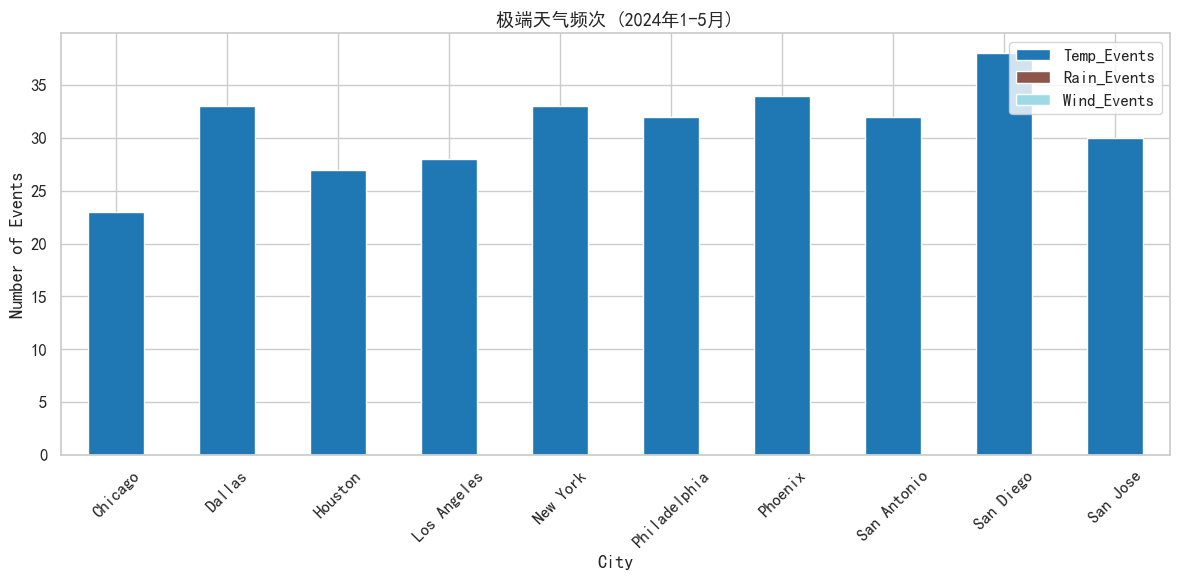

In [6]:
# 堆积图（包括温度、降雨量、风速）
plt.figure(figsize=(12, 6))
extreme_counts.set_index('City').plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title('极端天气频次 (2024年1-5月)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../Figures/各城市极端天气事件出现频率堆积图.png", dpi=300)
plt.show()

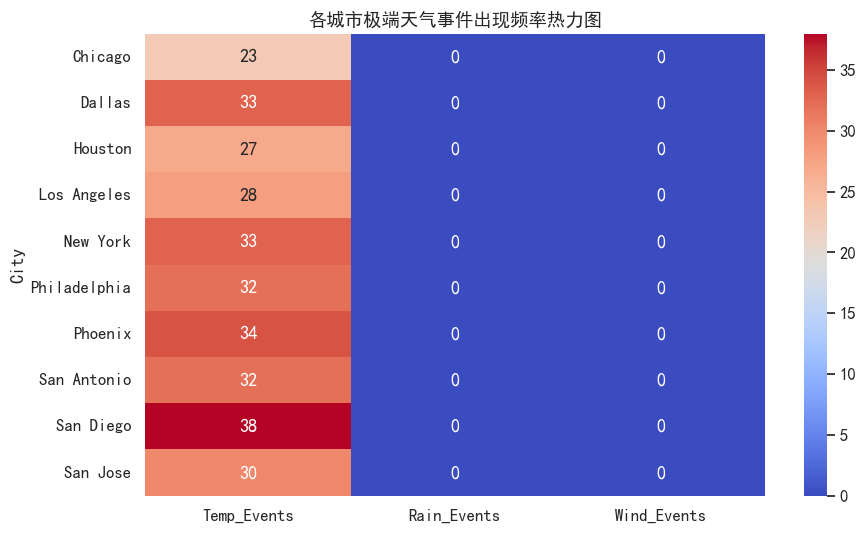

In [7]:
# 热力图
plt.figure(figsize=(10, 6))
sns.heatmap(extreme_counts.set_index('City'), annot=True, cmap='coolwarm', fmt='d')
plt.title("各城市极端天气事件出现频率热力图")
plt.savefig("../Figures/各城市极端天气事件出现频率热力图.png", dpi=300) 
plt.show()

### 统计各城市每月极端高温和低温频率

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` par

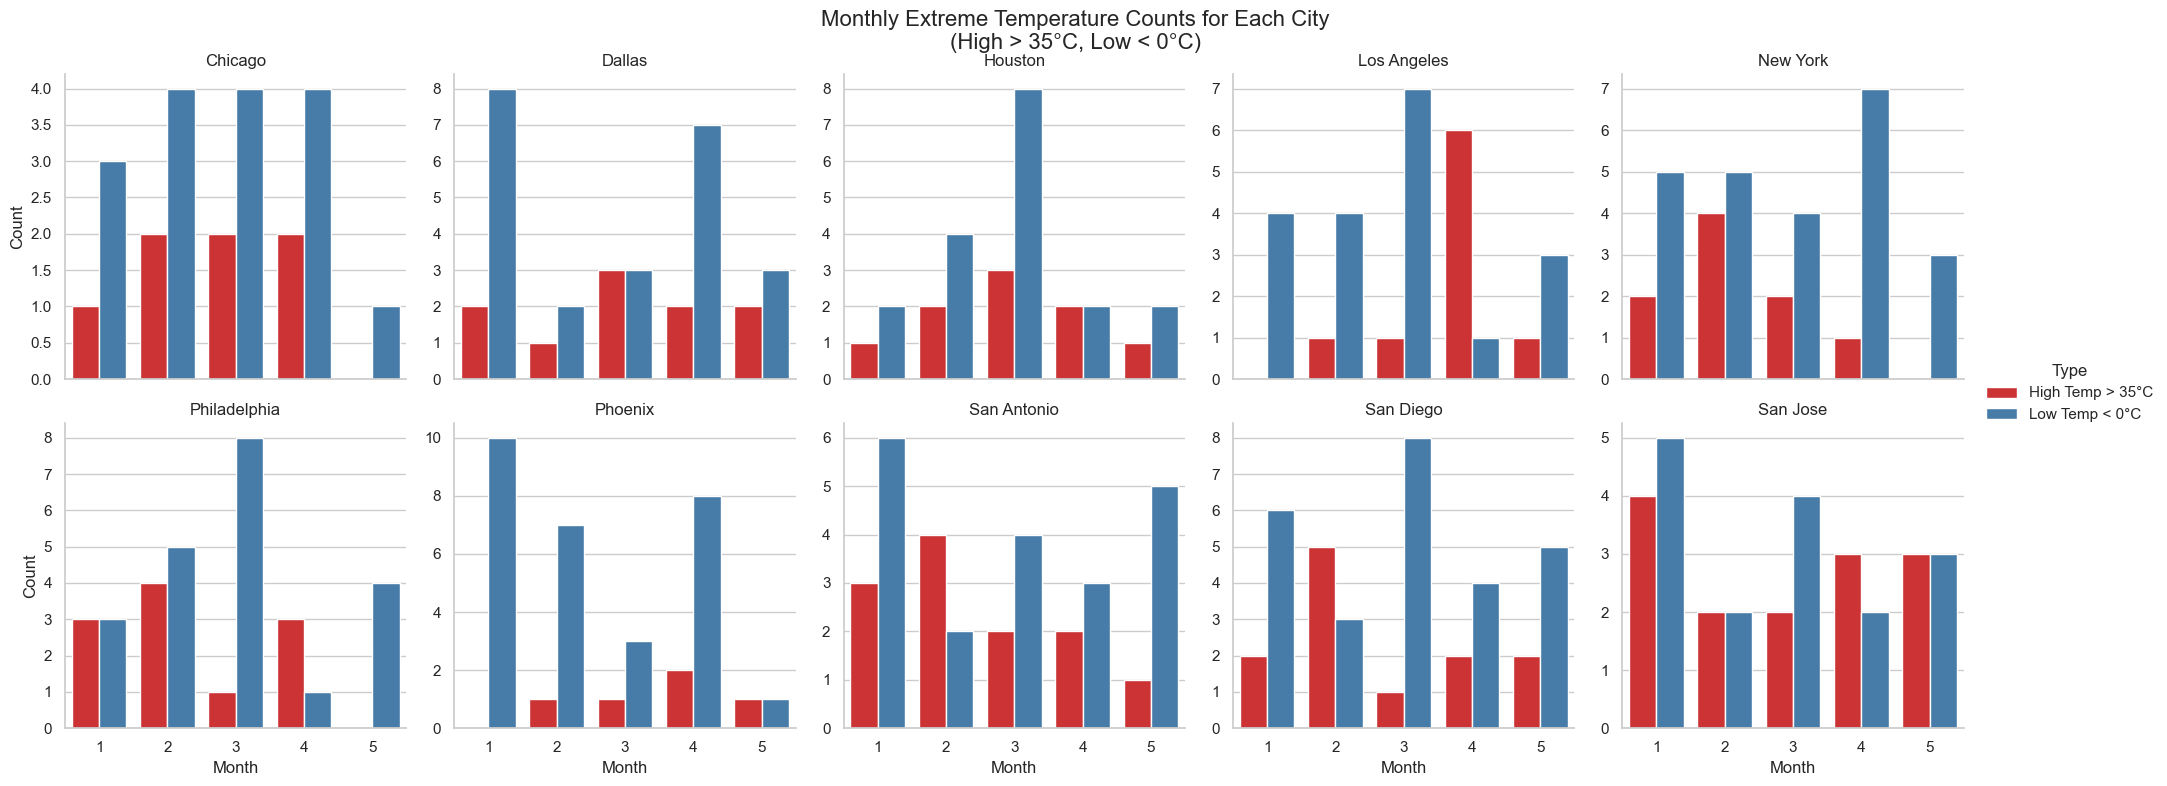

In [28]:
# 由于只存在温度一项极端值，所以对异常温度进行细分统计
df['Extreme_High'] = df['Temperature_C'] > extreme_temp_high
df['Extreme_Low'] = df['Temperature_C'] < extreme_temp_low

# 确保时间是datetime类型，提取月份
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month'] = df['Date_Time'].dt.month

# 分组统计每个城市每个月的高温和低温极端次数
monthly_extremes = df.groupby(['Location', 'Month'])[['Extreme_High', 'Extreme_Low']].sum().reset_index()

# 转成长格式方便绘图
plot_data = pd.melt(
    monthly_extremes,
    id_vars=['Location', 'Month'],
    value_vars=['Extreme_High', 'Extreme_Low'],
    var_name='Extreme_Type',
    value_name='Count'
)


sns.set(style="whitegrid")
g = sns.FacetGrid(plot_data, col='Location', col_wrap=5, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='Month', y='Count', hue='Extreme_Type', palette='Set1', ci=None)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Count")
g.add_legend(title='Type', labels=['High Temp > 35°C', 'Low Temp < 0°C'])

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Extreme Temperature Counts for Each City\n(High > 35°C, Low < 0°C)", fontsize=16)
plt.savefig("../Figures/各城市每月极端高温和低温频率条形图.png", dpi=300)
plt.show()


### 统计月度均温趋势

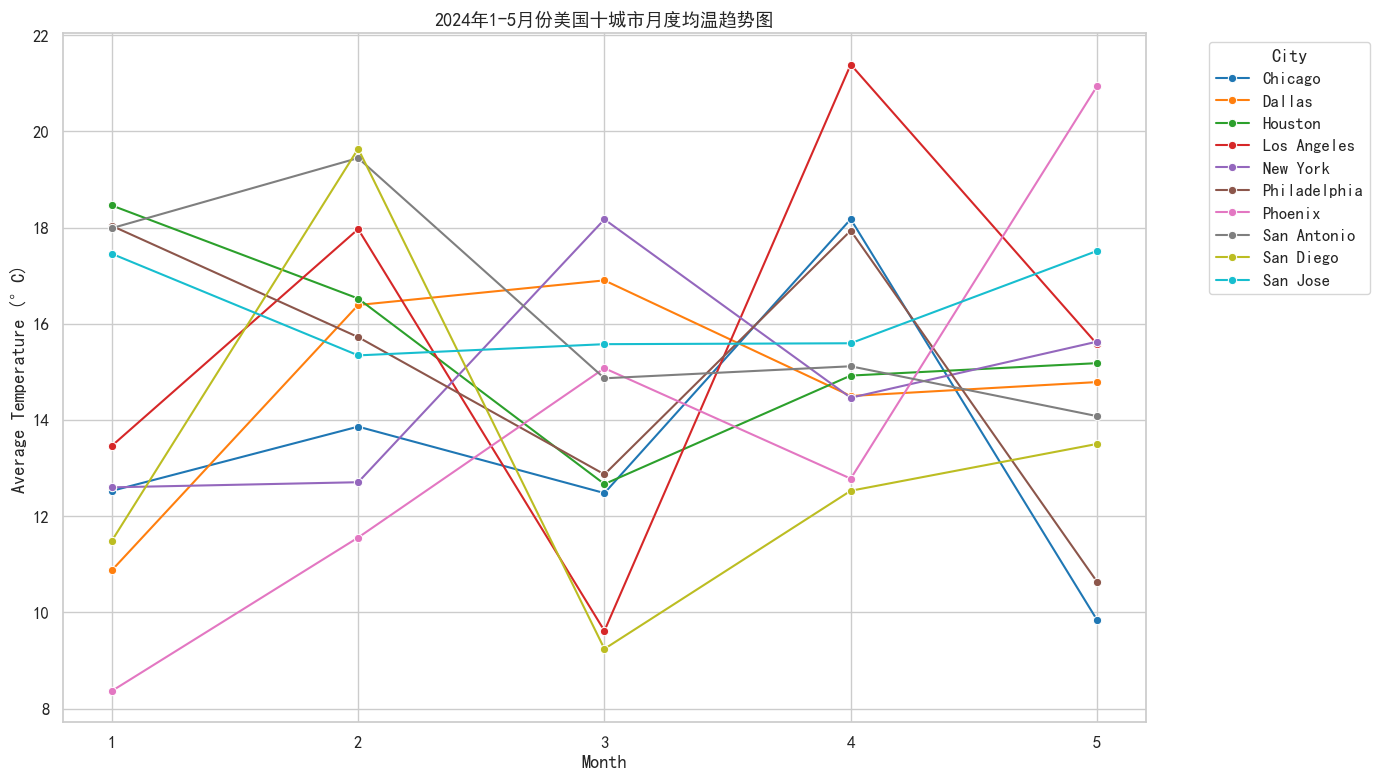

In [17]:
# 折线图
# 确保日期列是datetime格式
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month'] = df['Date_Time'].dt.month

# 按城市和月份计算平均温度
monthly_avg_temp = df.groupby(['Location', 'Month'])['Temperature_C'].mean().reset_index()

# 画图
plt.figure(figsize=(14,8))
sns.lineplot(data=monthly_avg_temp, x='Month', y='Temperature_C', hue='Location', marker='o', palette='tab10')

plt.title('2024年1-5月份美国十城市月度均温趋势图')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1,6))
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../Figures/月度均温趋势图.png", dpi=300)
plt.show()

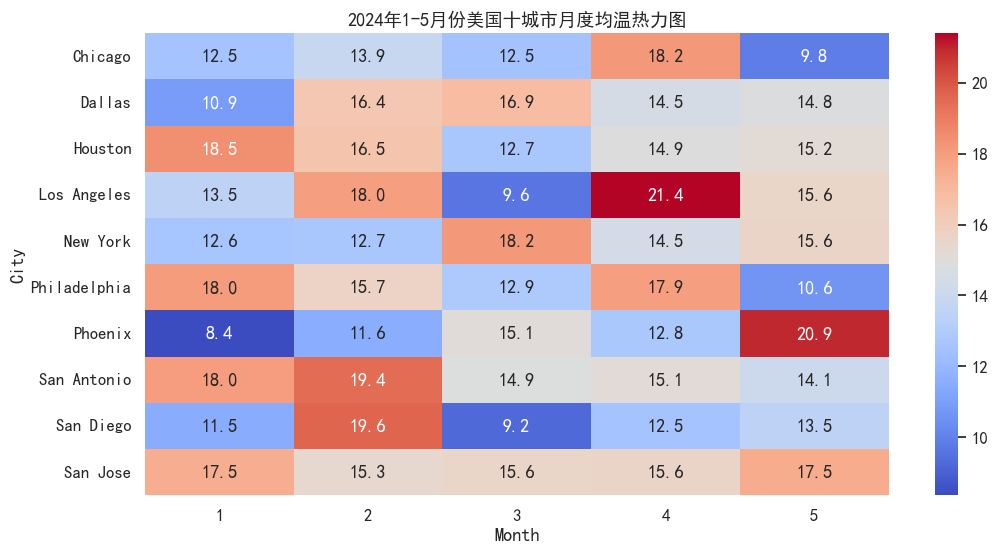

In [18]:
# 热力图
heatmap_data = monthly_avg_temp.pivot(index='Location', columns='Month', values='Temperature_C')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('2024年1-5月份美国十城市月度均温热力图')
plt.xlabel('Month')
plt.ylabel('City')
plt.savefig("../Figures/月度均温趋势热力图.png", dpi=300)
plt.show()

### 统计月度平均降水量趋势

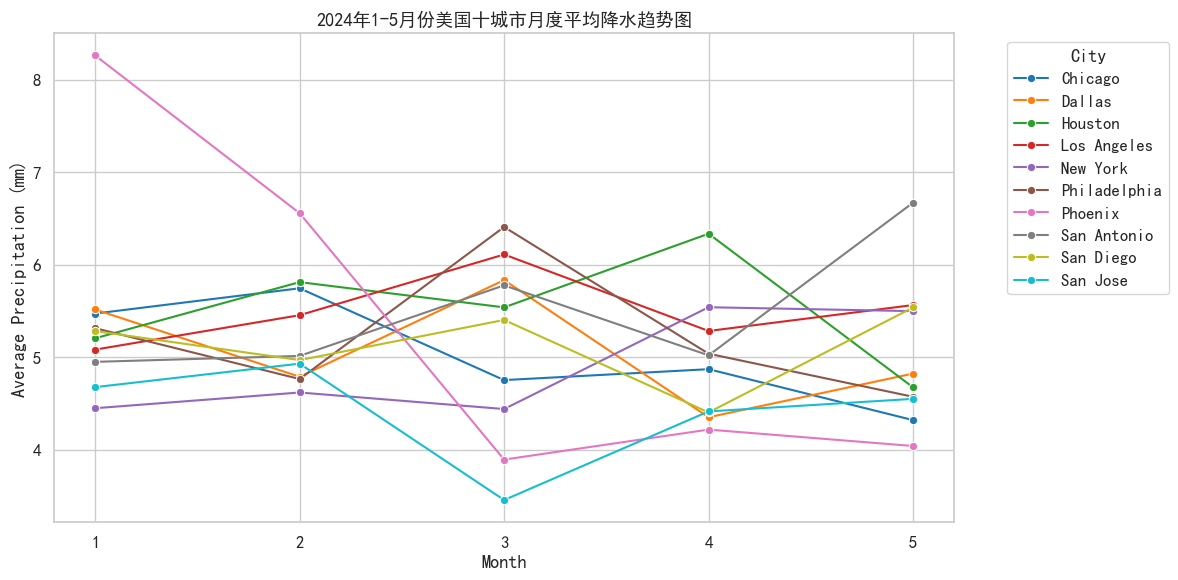

In [19]:
# 计算每个城市每月平均降水量
monthly_precip = df.groupby(['Location', 'Month'])['Precipitation_mm'].mean().reset_index()

# 绘制折线图
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_precip, x='Month', y='Precipitation_mm', hue='Location', marker='o', palette='tab10')

plt.title('2024年1-5月份美国十城市月度平均降水趋势图')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(range(1, 6))  
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../Figures/月度平均降水量趋势图.png", dpi=300)
plt.show()

### 统计月度平均风速趋势

In [21]:
df['Month'] = df['Date_Time'].dt.month
monthly_wind_speed = df.groupby(['Location', 'Month'])['Wind_Speed_kmh'].mean().reset_index()

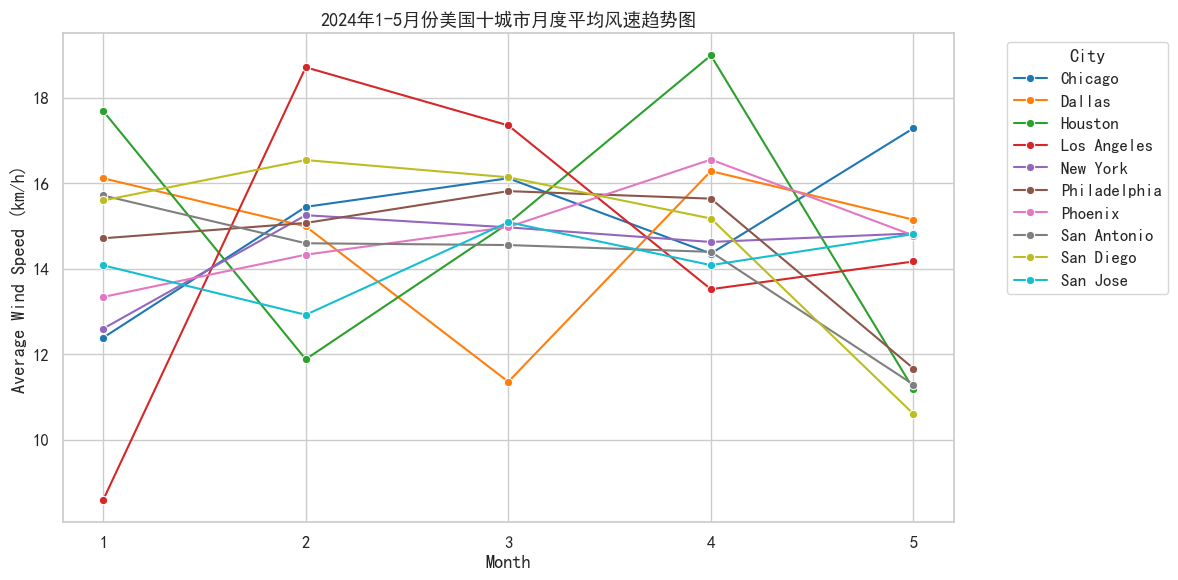

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_wind_speed,
    x='Month',
    y='Wind_Speed_kmh',
    hue='Location',
    marker='o',
    palette='tab10'  
)

plt.title('2024年1-5月份美国十城市月度平均风速趋势图')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (km/h)')
plt.xticks(range(1,6))
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.savefig("../Figures/月度平均风速趋势图.png", dpi=300)
plt.show()